<br>
<div style="text-align: center;"> <img src="UTM logo.png", style="width: 250px";> 
</div>
<br>   

## <div style="text-align: center;"> <b> FACULTY OF COMPUTING </b> 
</div>

______________________________________________________________________________________________________________
### <div style="text-align: center;"> <b> MCSD 2123 MASSIVE DATA MINING AND STREAMING <b>
</div>
<div style="text-align: center;"> <b> 20242025 – Sem 1 (Cohort 10) <b>
</div>
<div style="text-align: center;"> <b> Group Assignment 2 : <b>
</div>
<div style="text-align: center;"> <b>"Classifying Movie Genres Based on Textual Descriptions Using Supervised Machine Learning"<b>
</div>
<br>
<div style="text-align: center;"> Lecturer      	   : Dr. Chan Weng Howe
</div>
<div style="text-align: center;"> Date of Submission   : 6th December 2024
</div> 

______________________________________________________________________________________________________________

<div style="text-align: center;"> Prepared by :
<br>
</div>
<div style="text-align: center;"> <img src="Group Member Info.png", style="width: 400px";> 
</div>

## <span style='color:darkblue'> 1. Understand the dataset

### 1.1 Import libraries, load data and convert into dataframe

In [1]:
# import libraries
import pandas as pd
import numpy as np

# read .csv movie dataset
movie = pd.read_csv("TMDB_movie_dataset_v11.csv")

# create data frame
movie_df = pd.DataFrame(movie)
movie_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### 1.2 Exploratory Data Analysis (EDA)

In [2]:
# get the info of the data, object (categorical) and int64 (numerical) 
print(movie_df.info())
print()

# identify the missing values for each attribute (column)
null_count = movie_df.isnull().sum()
print("null count : \n" , null_count)
print()

# identify duplicate rows
duplicate_count = movie_df.duplicated().sum()
print("duplicate count : \n" , duplicate_count)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134327 entries, 0 to 1134326
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1134327 non-null  int64  
 1   title                 1134314 non-null  object 
 2   vote_average          1134327 non-null  float64
 3   vote_count            1134327 non-null  int64  
 4   status                1134327 non-null  object 
 5   release_date          948334 non-null   object 
 6   revenue               1134327 non-null  int64  
 7   runtime               1134327 non-null  int64  
 8   adult                 1134327 non-null  bool   
 9   backdrop_path         301168 non-null   object 
 10  budget                1134327 non-null  int64  
 11  homepage              120210 non-null   object 
 12  imdb_id               602087 non-null   object 
 13  original_language     1134327 non-null  object 
 14  original_title        1134314 non-

Statistics of Overview Lengths:
count    1.134327e+06
mean     3.683064e+01
std      3.630991e+01
min      0.000000e+00
25%      7.000000e+00
50%      2.700000e+01
75%      5.500000e+01
max      2.260000e+02
Name: overview_length, dtype: float64


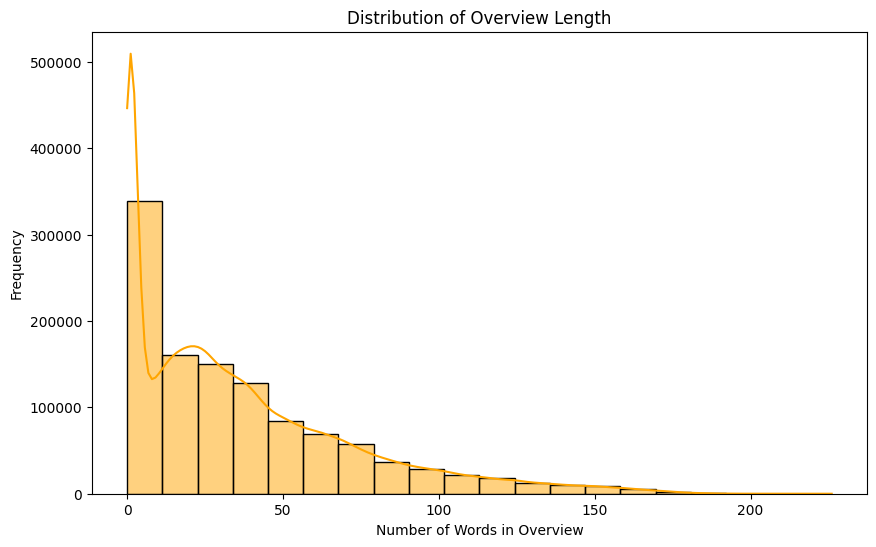

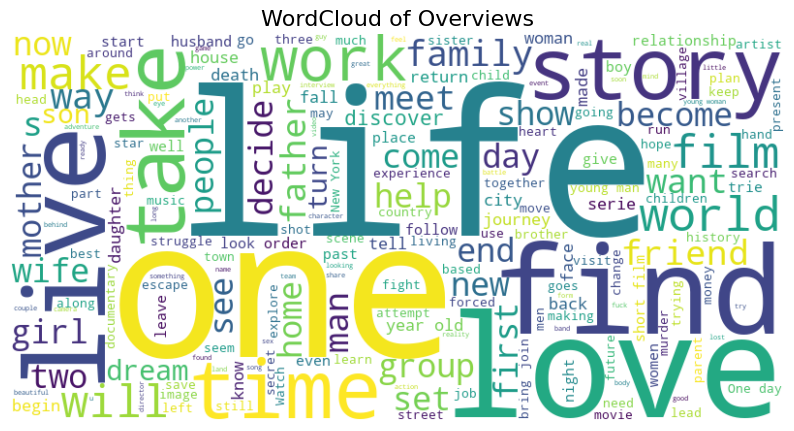

genres
Documentary                                               134719
Drama                                                     106676
Comedy                                                     58938
Animation                                                  31395
Music                                                      25432
                                                           ...  
TV Movie, Crime, Horror, Thriller                              1
War, Horror, Science Fiction                                   1
Music, Action, Western                                         1
Fantasy, Romance, Family, Drama                                1
Animation, Fantasy, Comedy, Romance, Adventure, Horror         1
Name: count, Length: 13322, dtype: int64



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# explore the distribution of the length of overviews (text)
movie_df['overview_length'] = movie_df['overview'].apply(lambda x: len(str(x).split()))

# basic statistics for overview lengths
overview_stats = movie_df['overview_length'].describe()
print("Statistics of Overview Lengths:")
print(overview_stats)

# plot the distribution of overview lengths
plt.figure(figsize=(10, 6))
sns.histplot(movie_df['overview_length'], bins=20, kde=True, color='orange')
plt.title('Distribution of Overview Length')
plt.xlabel('Number of Words in Overview')
plt.ylabel('Frequency')
plt.show()

# Concatenate all overviews into a single string
text = " ".join(overview for overview in movie_df['overview'].dropna())

# Create a word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("WordCloud of Overviews", fontsize=16)
plt.show()

# explore the distribution of genres (since it's a multi-label classification)
genre_counts = movie_df['genres'].value_counts()
print(genre_counts)
print()

The dataset has 1134327 entries and 24 columns with various attributes about movies, such as titles, genres, overviews, release dates, and revenue. From the information, the relevant columns for classification is `overview` (Textual descriptions that can be used as features for classification) and `genres` (The target variable indicating the movie's genres.). There are some null and duplicate values found in the dataset. Therefore, the removal of those values will be considered in the data preprocessing step. 

From the distribution of genres, there are several key challenges need to consider during data preprocessing step such as multi-label classification and textual feature extraction. To handle these , `MultiLabelBinarizer`will be used to handle multi-label classification (transform the multi-label into binary format) and text vectorization to convert text into numerical features.

From the distribution of the length of overviews, preprocessing step such as text normalization, handling variable length by padding and feature extraction by using TF-IDF need to be considered.

## <span style='color:darkblue'> 2. Data Preprocessing

### 2.1 Remove unnecessary columns, null and duplicates values

In [4]:
# remove unnecessary columns
movie_df = movie_df[['overview', 'genres']]

# drop rows with missing values in 'overview' or 'genres'
movie_df = movie_df.dropna(subset=['overview', 'genres'])

# remove blank reviews
movie_df = movie_df[movie_df['overview'].str.strip() != ""]  

# remove duplicate rows
movie_df = movie_df.drop_duplicates()
movie_df

,overview,genres
0,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure"
1,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction"
2,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller"
3,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction"
4,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure"
...,...,...
1134307,Ghost hunters go to an old settler village and...,"Western, Science Fiction"
1134314,Short documentary on people who survived the N...,"Documentary, War"
1134319,Spanish documentary that takes a look at the a...,Documentary
1134322,"When I close my eyes, certain images linger. T...",Documentary


### 2.2 Preprocess for `overview` column

#### 2.2.1 Conduct text preprocessing (`lowercase`, `tokenization`, `lemmatization`, `remove stopwords` and `remove punctuation`) 

In [5]:
%%time

import re
import nltk
import joblib

from nltk.tokenize import word_tokenize # to split sentence into individual words or tokens
from nltk import pos_tag # to indicate whether each word is a noun, verb, adjective, etc.
from nltk.stem import WordNetLemmatizer # to reduce words to their base or dictionary form
from nltk.corpus import stopwords # to determine meaningless words (eg.the, is, and, etc.)
from joblib import Parallel, delayed  # For parallel processing

# download necessary resources
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('stopwords')

# initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the text preprocessing function
def preprocess_text_with_keywords(text):
    # Step 1: Lowercase
    text = text.lower()
    
    # Step 2: Tokenization
    tokens = word_tokenize(text)
    
    # Step 3: POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    # Step 4: Define relevant POS tags for extracting meaningful keywords
    relevant_tags = {"NN", "NNS", "NNP", "NNPS", "JJ", "JJR", "JJS", "VB", "VBG", "VBD", "VBN"}
    keywords = [word for word, pos in pos_tags if pos in relevant_tags and word not in stop_words]
    
    # Step 5: Remove words containing numbers (e.g., "22nd", "3rd")
    keywords = [word for word in keywords if not re.search(r'\b\w*\d\w*\b', word)]
    
    # Step 6: Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in keywords]
    
    # Step 7: Punctuation removal
    clean_tokens = [re.sub(r'[^a-zA-Z\s]', '', word) for word in lemmatized_tokens if re.sub(r'[^a-zA-Z\s]', '', word)]
    
    return ' '.join(clean_tokens)

CPU times: user 361 ms, sys: 187 ms, total: 548 ms
Wall time: 3.88 s


In [6]:
# Assuming you have a function defined for preprocessing  
def preprocess_in_parallel(df):  
    # Example preprocessing logic (replace with your actual logic)  
    # This function should return a Series or DataFrame with processed data  
    return df['overview'].apply(lambda x: x.lower())  # Example: converting text to lowercase  

# Apply parallel preprocessing to the 'overview' column  
movie_df['processed_overview'] = preprocess_in_parallel(movie_df)  

# Display the updated DataFrame  
print(movie_df[['overview', 'processed_overview']])

                                                  overview  \
0        Cobb, a skilled thief who commits corporate es...   
1        The adventures of a group of explorers who mak...   
2        Batman raises the stakes in his war on crime. ...   
3        In the 22nd century, a paraplegic Marine is di...   
4        When an unexpected enemy emerges and threatens...   
...                                                    ...   
1134307  Ghost hunters go to an old settler village and...   
1134314  Short documentary on people who survived the N...   
1134319  Spanish documentary that takes a look at the a...   
1134322  When I close my eyes, certain images linger. T...   
1134323  An audio-visual critique of the world of IMMAM...   

                                        processed_overview  
0        cobb, a skilled thief who commits corporate es...  
1        the adventures of a group of explorers who mak...  
2        batman raises the stakes in his war on crime. ...  
3        in

#### 2.2.2 Conduct text tokenization and pad sequence for `processed_overview`

In [7]:
# Tokenize and pad sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000)  # Use up to 5000 most common words
tokenizer.fit_on_texts(movie_df['processed_overview'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(movie_df['processed_overview'])

# Pad sequences to a fixed length
MAX_OVERVIEW_LENGTH = 100
padded_sequences = pad_sequences(sequences, maxlen=MAX_OVERVIEW_LENGTH, padding='post', truncating='post')

# Add padded sequences back to DataFrame
movie_df['overview_padded'] = list(padded_sequences)
movie_df

,overview,genres,processed_overview,overview_padded
0,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","cobb, a skilled thief who commits corporate es...","[2, 1525, 20, 3682, 3218, 15, 1, 3, 8, 7, 2794..."
1,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",the adventures of a group of explorers who mak...,"[1, 784, 3, 2, 123, 3, 20, 108, 475, 3, 2, 138..."
2,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",batman raises the stakes in his war on crime. ...,"[3821, 1, 4494, 6, 8, 106, 12, 344, 9, 1, 121,..."
3,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","in the 22nd century, a paraplegic marine is di...","[6, 1, 361, 2, 3219, 7, 5, 1, 1381, 12, 2, 495..."
4,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",when an unexpected enemy emerges and threatens...,"[29, 16, 506, 1168, 3118, 4, 1388, 1274, 2156,..."
...,...,...,...,...
1134307,Ghost hunters go to an old settler village and...,"Western, Science Fiction",ghost hunters go to an old settler village and...,"[636, 2832, 113, 5, 16, 56, 179, 4, 317, 2, 90..."
1134314,Short documentary on people who survived the N...,"Documentary, War",short documentary on people who survived the n...,"[103, 61, 12, 66, 20, 2770, 1, 1355, 4224, 407..."
1134319,Spanish documentary that takes a look at the a...,Documentary,spanish documentary that takes a look at the a...,"[1255, 61, 14, 105, 2, 214, 22, 1, 271, 6, 225..."
1134322,"When I close my eyes, certain images linger. T...",Documentary,"when i close my eyes, certain images linger. t...","[29, 151, 452, 311, 597, 1436, 576, 1, 116, 15..."


#### 2.2.3 TF-IDF Vectorization

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(movie_df['processed_overview'])
x_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20373400 stored elements and shape (562881, 325998)>

### 2.3 Preprocess for `genres` column

#### 2.3.1 Simplify and Encode Genres

In [9]:
# simplify genres: Keep only the first genre in the list
movie_df['genres'] = movie_df['genres'].apply(lambda x: x.split(",")[0] if isinstance(x, str) else x)

# display unique genres to understand the distribution
print(movie_df['genres'].value_counts())
print()

from sklearn.preprocessing import LabelEncoder

# Encode primary genres
le = LabelEncoder()
y = le.fit_transform(movie_df['genres'])

genres
Drama              135931
Documentary        124676
Comedy              78383
Animation           41196
Horror              33876
Action              26500
Music               24610
Romance             16353
Thriller            15356
Crime               12987
Science Fiction      8097
Adventure            8026
Family               7684
Fantasy              6606
Western              5840
Mystery              5294
TV Movie             5026
History              3453
War                  2987
Name: count, dtype: int64



### 2.4 EDA after preprocessing

In [10]:
# Check for null values
print("Null values in each column:")
print(movie_df.isnull().sum())
print() 

Null values in each column:
overview              0
genres                0
processed_overview    0
overview_padded       0
dtype: int64



#### 2.4.1 For `processed_overview`

Statistics of Overview Lengths After Preprocessing:
count    562881.000000
mean         46.928594
std          34.092799
min           1.000000
25%          22.000000
50%          37.000000
75%          64.000000
max         226.000000
Name: overview_length, dtype: float64


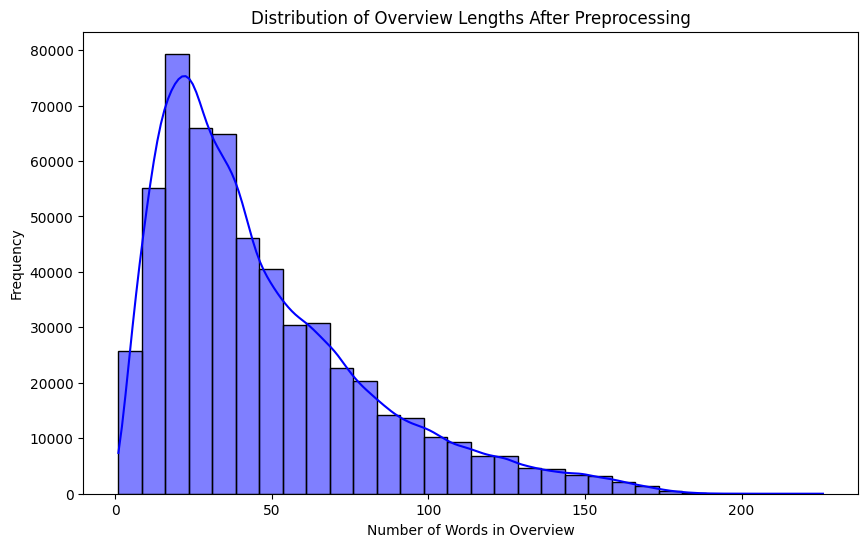

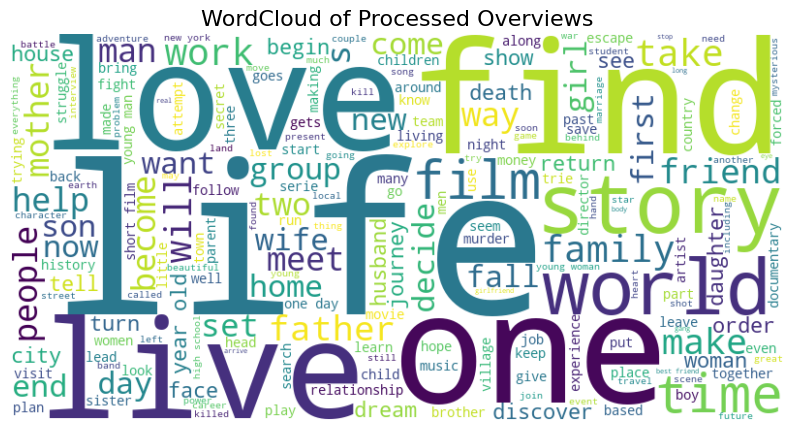

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud

# Distribution of overview lengths after preprocessing
movie_df['overview_length'] = movie_df['processed_overview'].apply(lambda x: len(x.split()))

# Basic statistics for overview lengths
overview_stats = movie_df['overview_length'].describe()
print("Statistics of Overview Lengths After Preprocessing:")
print(overview_stats)

# Plot the distribution of overview lengths
plt.figure(figsize=(10, 6))
sns.histplot(movie_df['overview_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Overview Lengths After Preprocessing")
plt.xlabel("Number of Words in Overview")
plt.ylabel("Frequency")
plt.show()

# Generate a WordCloud for the processed_overview column
all_text = ' '.join(movie_df['processed_overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("WordCloud of Processed Overviews", fontsize=16)
plt.show()

#### 2.4.2 For `genres`

genres
Drama              135931
Documentary        124676
Comedy              78383
Animation           41196
Horror              33876
Action              26500
Music               24610
Romance             16353
Thriller            15356
Crime               12987
Science Fiction      8097
Adventure            8026
Family               7684
Fantasy              6606
Western              5840
Mystery              5294
TV Movie             5026
History              3453
War                  2987
Name: count, dtype: int64



/var/folders/v5/_jm3xwg16gn354cp70dxvl180000gn/T/ipykernel_1166/2538207063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


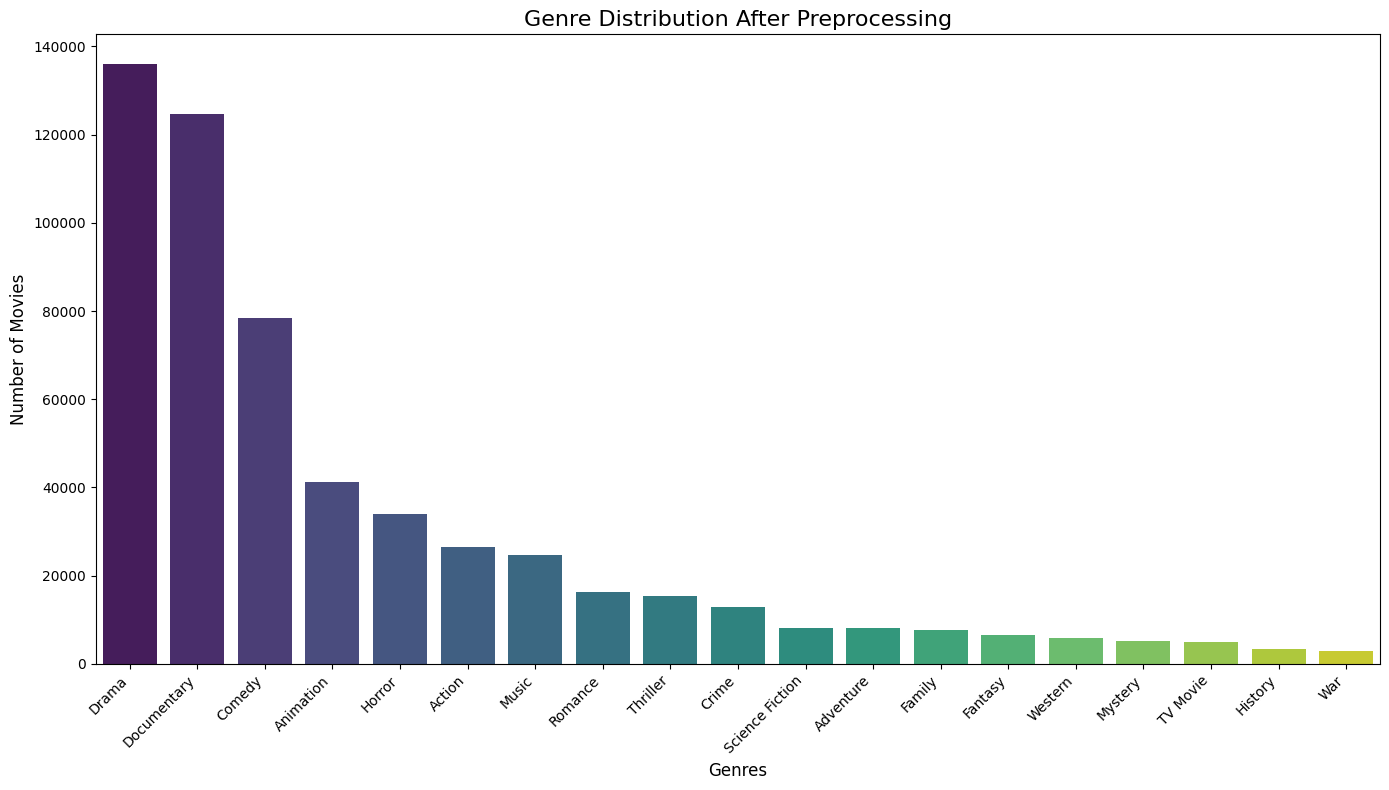

In [12]:
# Explore the distribution of genres (since it's a multi-label classification)
genre_counts = movie_df['genres'].explode().value_counts()  # Explode for multi-label split
print(genre_counts)
print()

# Plot the distribution of genres
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Genre Distribution After Preprocessing", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Ensure full genre names are visible
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

## 4. Model Training

### 4.1 Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

# numerical overview
x = x_tfidf

# target variable (genres)
y = y

# Split data for both TF-IDF and padded sequences (80:20)
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_padded, x_test_padded, _, _ = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Print shapes to verify consistency
print(f"TF-IDF Train Data Shape: {x_train_tfidf.shape}")
print(f"TF-IDF Test Data Shape: {x_test_tfidf.shape}")
print(f"Neural Network Train Data Shape: {x_train_padded.shape}")
print(f"Neural Network Test Data Shape: {x_test_padded.shape}")

TF-IDF Train Data Shape: (450304, 325998)
TF-IDF Test Data Shape: (112577, 325998)
Neural Network Train Data Shape: (450304, 100)
Neural Network Test Data Shape: (112577, 100)


### 4.1.1 Model Training : `Support Vector Machine (SVM)`

In [14]:
%%time

from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

# Initialize Linear SVM
svm_linear = OneVsRestClassifier(LinearSVC(verbose=1, max_iter=5000, random_state=42), n_jobs=-1)

# Train the model
svm_linear.fit(x_train_tfidf, y_train)

# Predict on test data
svm_linear_pred = svm_linear.predict(x_test_tfidf)
svm_linear_pred

iter  1 act 4.250e+05 pre 4.250e+05 delta 9.593e-01 f 4.503e+05 |g| 8.862e+05 CG   1
iter  1 act 4.258e+05 pre 4.258e+05 delta 9.601e-01 f 4.503e+05 |g| 8.869e+05 CG   1
iter  1 act 4.095e+05 pre 4.095e+05 delta 9.416e-01 f 4.503e+05 |g| 8.698e+05 CG   1
iter  1 act 3.696e+05 pre 3.696e+05 delta 8.946e-01 f 4.503e+05 |g| 8.264e+05 CG   1
iter  1 act 1.206e+05 pre 1.206e+05 delta 5.112e-01 f 4.503e+05 |g| 4.717e+05 CG   1
iter  1 act 2.348e+05 pre 2.348e+05 delta 7.131e-01 f 4.503e+05 |g| 6.586e+05 CG   1
iter  1 act 1.402e+05 pre 1.402e+05 delta 5.517e-01 f 4.503e+05 |g| 5.084e+05 CG   1
iter  1 act 3.285e+05 pre 3.285e+05 delta 8.434e-01 f 4.503e+05 |g| 7.791e+05 CG   1
cg reaches trust region boundary
cg reaches trust region boundary
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 3.294e+03 pre 3.293e+03 delta 3.270e+00 f 8.068e+04 |g| 4.265e+03 CG   1
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 1.587e+03 pre 1.581e+03 d

array([ 2,  5,  3, ..., 13, 11, 17])

### 4.1.2 Model Tranining : `Random Forest`

### 4.1.3 Model Tranining : `Neural Network`

## 5. Model Evaluation

### 5.1 `Support Vector Machine (SVM)`

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate the confusion matrix for single-label classification
cm = confusion_matrix(y_test, svm_linear_pred)

# Print the confusion matrix for each genre using `le.classes_`
for i, genre in enumerate(le.classes_):  # Using `le.classes_` for genre names
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])  # True Negatives
    fp = cm[:, i].sum() - cm[i, i]  # False Positives
    fn = cm[i, :].sum() - cm[i, i]  # False Negatives
    tp = cm[i, i]  # True Positives
    print(f"Confusion Matrix for Genre '{genre}':")
    print(f"[[TN: {tn}, FP: {fp}],")
    print(f" [FN: {fn}, TP: {tp}]]\n")

# Calculate and print overall metrics
accuracy = accuracy_score(y_test, svm_linear_pred)
precision = precision_score(y_test, svm_linear_pred, average='micro')
recall = recall_score(y_test, svm_linear_pred, average='micro')
f1 = f1_score(y_test, svm_linear_pred, average='micro')

print("\nLinear SVM Accuracy:", accuracy)
print("Linear SVM Precision:", precision)
print("Linear SVM Recall:", recall)
print("Linear SVM F1 Score:", f1)

Confusion Matrix for Genre 'Action':
[[TN: 104879, FP: 2378],
 [FN: 3029, TP: 2291]]

Confusion Matrix for Genre 'Adventure':
[[TN: 110573, FP: 370],
 [FN: 1466, TP: 168]]

Confusion Matrix for Genre 'Animation':
[[TN: 101202, FP: 3113],
 [FN: 3936, TP: 4326]]

Confusion Matrix for Genre 'Comedy':
[[TN: 88845, FP: 7989],
 [FN: 7998, TP: 7745]]

Confusion Matrix for Genre 'Crime':
[[TN: 109050, FP: 971],
 [FN: 2121, TP: 435]]

Confusion Matrix for Genre 'Documentary':
[[TN: 79883, FP: 7717],
 [FN: 4263, TP: 20714]]

Confusion Matrix for Genre 'Drama':
[[TN: 66837, FP: 18420],
 [FN: 8666, TP: 18654]]

Confusion Matrix for Genre 'Family':
[[TN: 110847, FP: 247],
 [FN: 1345, TP: 138]]

Confusion Matrix for Genre 'Fantasy':
[[TN: 111083, FP: 214],
 [FN: 1213, TP: 67]]

Confusion Matrix for Genre 'History':
[[TN: 111839, FP: 77],
 [FN: 640, TP: 21]]

Confusion Matrix for Genre 'Horror':
[[TN: 102516, FP: 3264],
 [FN: 2829, TP: 3968]]

Confusion Matrix for Genre 'Music':
[[TN: 106601, FP: 115

### 5.2 `Random Forest`

In [16]:
%%time  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.model_selection import train_test_split

# Initialize the Random Forest Classifier with optimizations and handle imbalance  
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight='balanced', n_jobs=-1)  

# Fit the model on the sampled data  
rf.fit(x_train_tfidf, y_train)  

# Make predictions on test data  
y_pred = rf.predict(x_test_tfidf)

# Predict on test data
y_pred

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]CPU times: user 5h 25min 4s, sys: 1min 20s, total: 5h 26min 25s
Wall time: 45min 32s


array([ 5,  5,  6, ...,  3, 11, 17])

In [17]:
# Evaluate the Random Forest model  
accuracy_rf = accuracy_score(y_test, y_pred)  
report_rf = classification_report(y_test, y_pred)  

# Print metrics for Random Forest  
print("Random Forest Model Evaluation:")  
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")  
print("Random Forest Classification Report:")  
print(report_rf)

Random Forest Model Evaluation:
Random Forest Accuracy: 0.4724
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.14      0.23      5320
           1       0.13      0.01      0.02      1634
           2       0.73      0.23      0.35      8262
           3       0.46      0.19      0.27     15743
           4       0.47      0.03      0.05      2556
           5       0.59      0.83      0.69     24977
           6       0.37      0.82      0.50     27320
           7       0.44      0.01      0.02      1483
           8       0.30      0.01      0.02      1280
           9       0.00      0.00      0.00       661
          10       0.67      0.21      0.32      6797
          11       0.82      0.56      0.66      4819
          12       0.38      0.01      0.03      1008
          13       0.53      0.02      0.04      3295
          14       0.47      0.05      0.10      1585
          15       0.47      0.01  

### 5.3 `Neural Network`